In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse

from importa import *

In [2]:
file = "../../data/fluke_13-09-2021_prueba700.csv"
fluke = importa_fluke(file)
fluke.index = fluke.index - pd.Timedelta("-5min")

In [4]:
file = "../../data/geotermia_prueba700.txt"
fecha = fecha_geo(file)
print(fecha)
geo_base = importa_geo(file,fecha)
geo_base.index = geo_base.index - pd.Timedelta("0S")

2021-09-13 10:49:47


In [5]:
file = "../../data/s8lp_13-09-2021.csv"
s8lp = pd.read_csv(file,index_col=0,parse_dates=True)

In [6]:
file = "../../data/sen0220_13-09-2021.csv"
sen0220 = pd.read_csv(file,index_col=0,parse_dates=True)

In [7]:
file = "../../data/scd30_13-09-2021.csv"
scd30 = pd.read_csv(file,index_col=0,parse_dates=True)

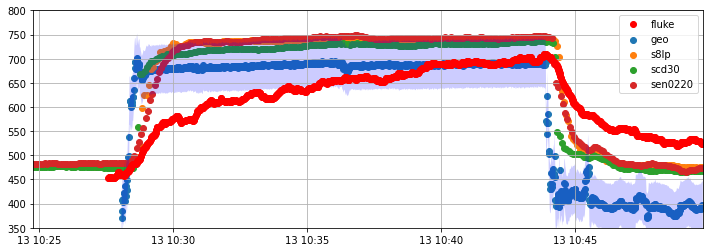

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = fecha - pd.Timedelta("25min")
fecha2 = fecha1 + pd.Timedelta("25min")

ax.scatter(geo_base.index,geo_base.CO2,label='geo')
ax.scatter(s8lp.index,s8lp,label='s8lp')
ax.scatter(scd30.index,scd30,label='scd30')
ax.scatter(sen0220.index,sen0220,label='sen0220')
ax.plot(fluke,"ro",label='fluke')

ax.fill_between(geo_base.index, geo_base.CO2 + 50, geo_base.CO2 - 50,facecolor='blue', alpha=0.2)


ax.set_xlim(fecha1,fecha2)
ax.set_ylim(350,800)
ax.grid()
ax.legend()